In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor

In [23]:
df = pd.read_csv("/home/sujaldangal/Desktop/new_data1.csv")
pd.set_option("display.max_columns", None)
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0
...,...,...,...,...,...,...,...,...
62640,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1
62641,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1
62642,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0
62643,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0


In [24]:
df = pd.DataFrame(df)
dummies_rain_tomorrow = pd.get_dummies(df['RainTomorrow'], prefix='RainTomorrow')
df = pd.concat([df, dummies_rain_tomorrow], axis=1)
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow,RainTomorrow_0,RainTomorrow_1
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,0,True,False
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,1,False,True
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,1,False,True
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,0,True,False
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...
62640,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,1,False,True
62641,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,1,False,True
62642,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,0,True,False
62643,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,0,True,False


In [25]:
df.drop(['RainTomorrow','RainTomorrow_1'],axis=1,inplace=True)

In [26]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,True
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,False
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,False
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,True
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,True
...,...,...,...,...,...,...,...,...
62640,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,False
62641,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,False
62642,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,True
62643,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,True


In [27]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 6
Discrete feature Count 2
Continuous feature Count 4
Categorical feature Count 2


In [28]:
df.isnull().sum()*100/len(df)

Location          0.000000
Date              0.379919
max_temp          0.000000
min_temp          0.000000
Humidity          0.000000
Rainfall          0.000000
RainToday         0.000000
RainTomorrow_0    0.000000
dtype: float64

In [29]:
print(numerical_feature)

['max_temp', 'min_temp', 'Humidity', 'Rainfall', 'RainToday', 'RainTomorrow_0']


In [30]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,True
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,False
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,False
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,True
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,True
...,...,...,...,...,...,...,...,...
62640,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,False
62641,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,False
62642,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,True
62643,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,True


In [31]:
df.value_counts().sum()

62407

In [32]:
df.shape

(62645, 8)

<Figure size 2000x2000 with 0 Axes>

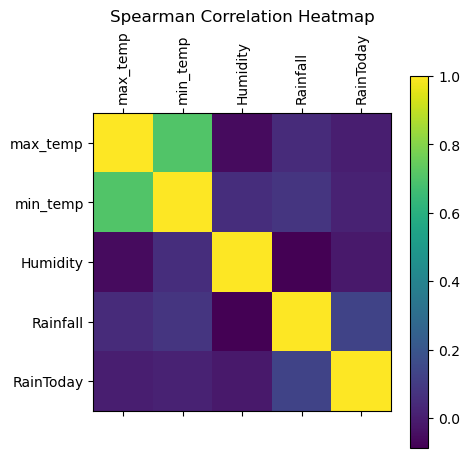

In [33]:


# Drop non-numeric columns or impute them with appropriate values
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corrmat = df_numeric.corr(method='spearman')

# Plot the heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.matshow(corrmat, cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.xticks(range(len(corrmat.columns)), corrmat.columns, rotation=90)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.colorbar()
plt.show()


/tmp/ipykernel_8122/2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


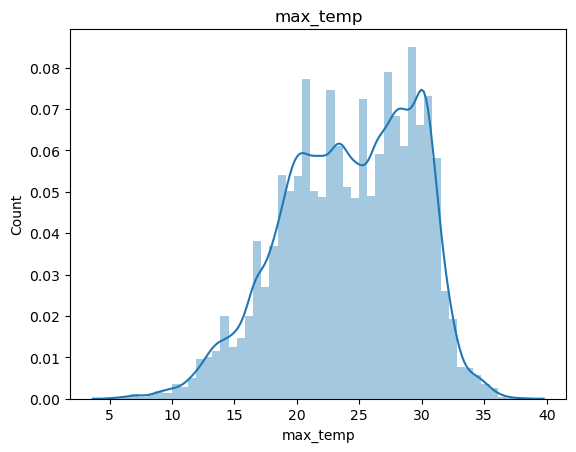

<Figure size 1500x1500 with 0 Axes>

/tmp/ipykernel_8122/2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


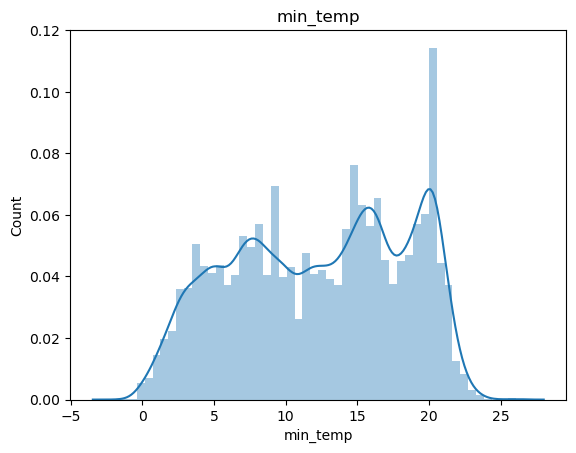

<Figure size 1500x1500 with 0 Axes>

/tmp/ipykernel_8122/2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


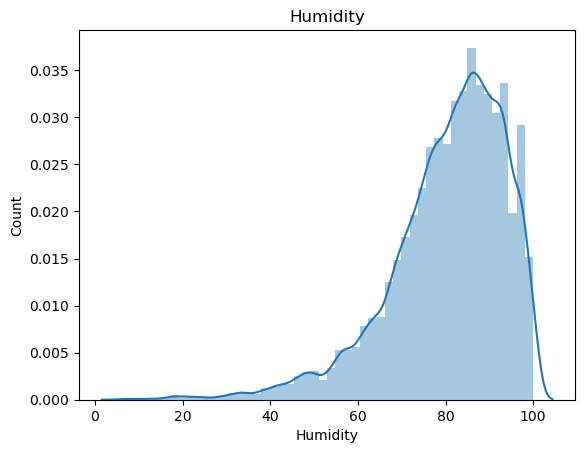

<Figure size 1500x1500 with 0 Axes>

/tmp/ipykernel_8122/2600242752.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sujaldangal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


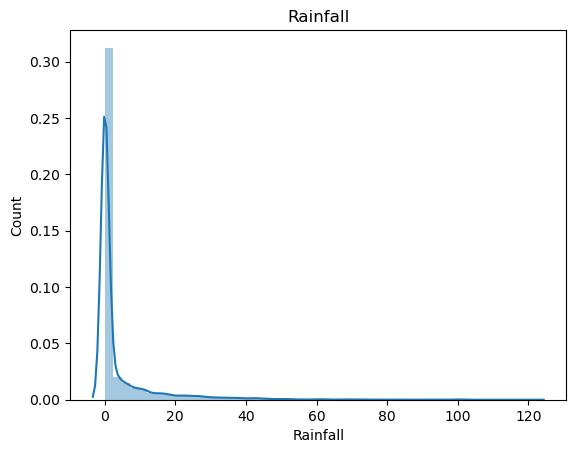

<Figure size 1500x1500 with 0 Axes>

In [34]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

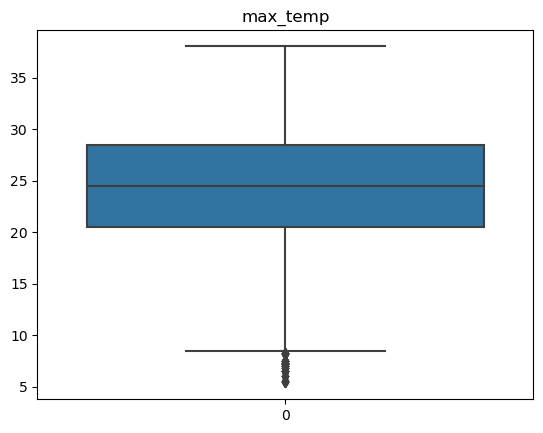

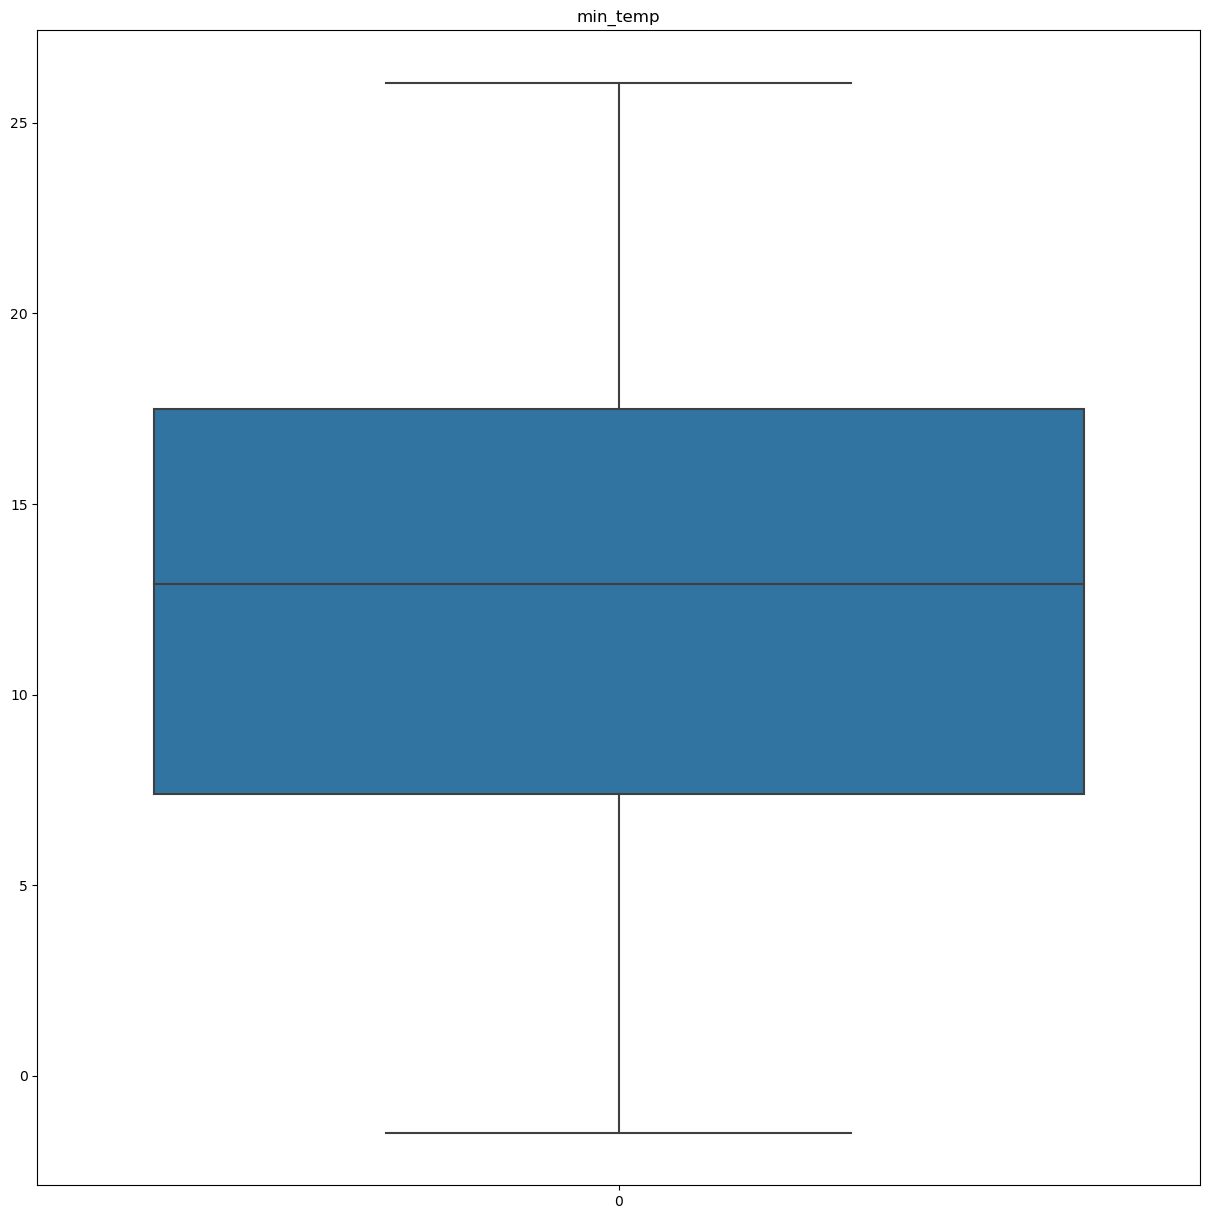

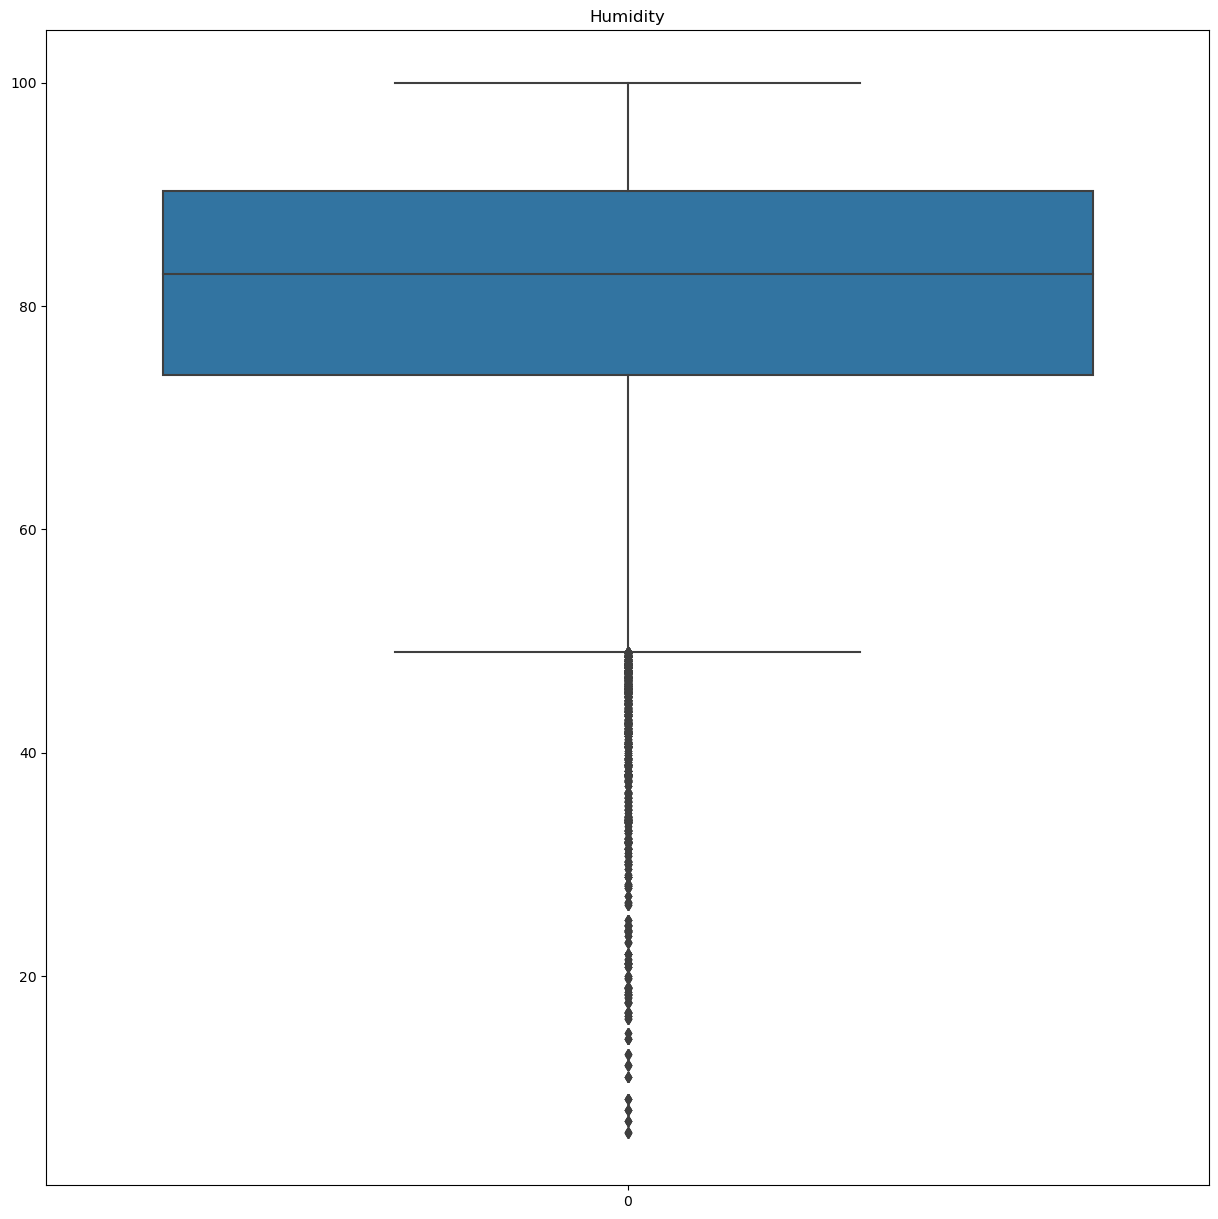

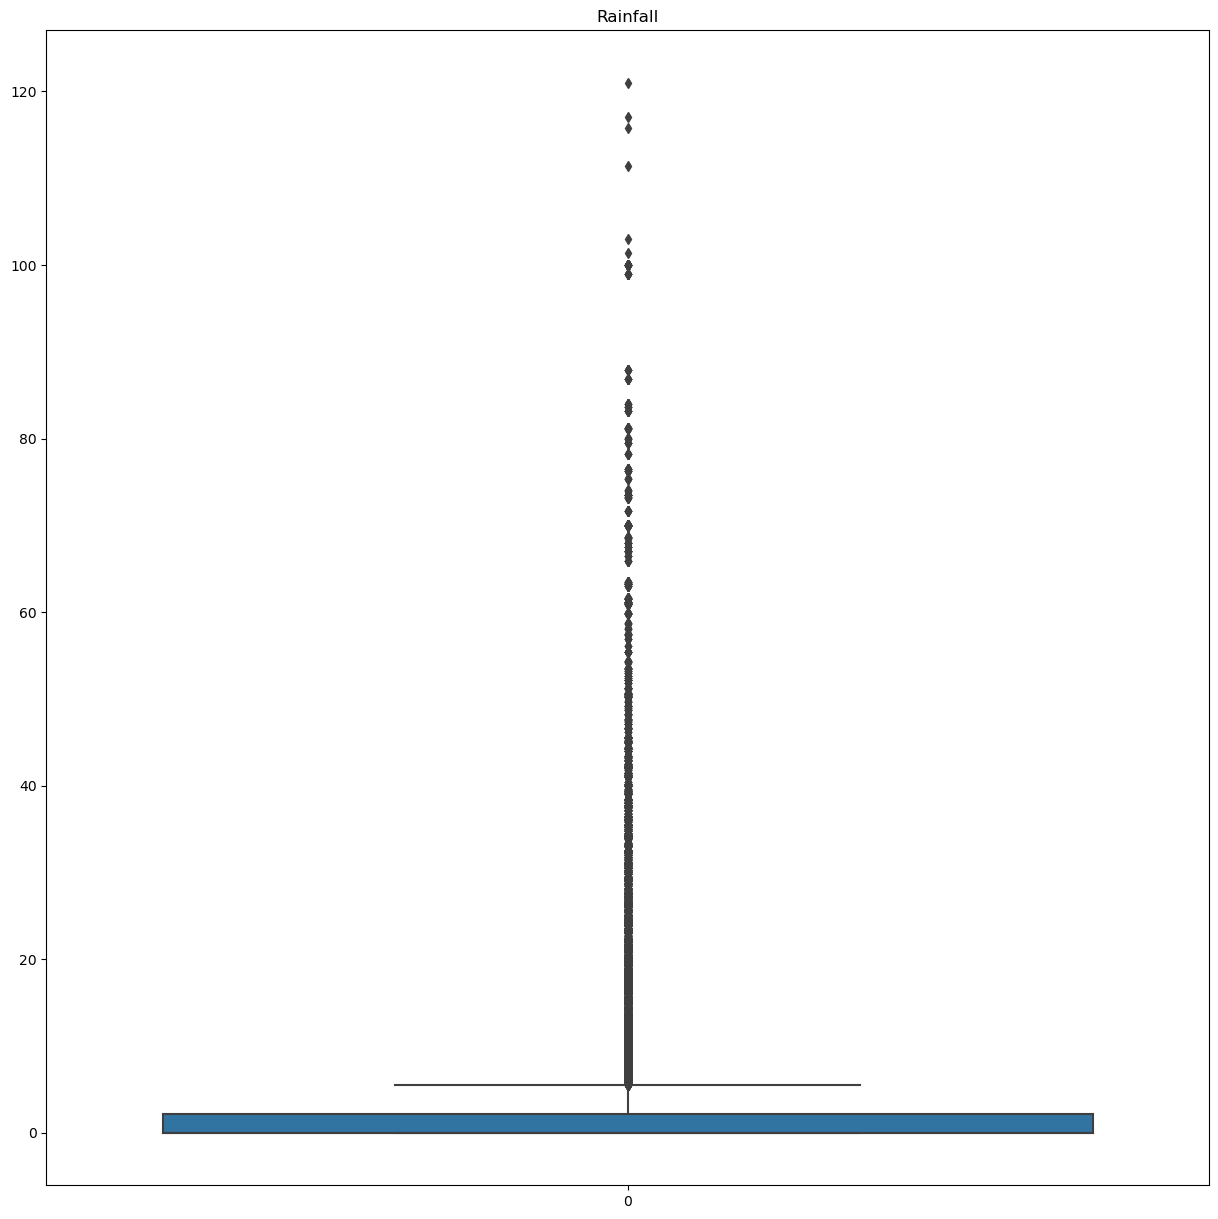

<Figure size 1500x1500 with 0 Axes>

In [35]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [36]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [37]:
df.isnull().sum()*100/len(df)

Location          0.000000
Date              0.379919
max_temp          0.000000
min_temp          0.000000
Humidity          0.000000
Rainfall          0.000000
RainToday         0.000000
RainTomorrow_0    0.000000
dtype: float64

In [38]:
discrete_feature

['RainToday', 'RainTomorrow_0']

In [39]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0
0,Buddhanilakantha,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,True
1,Buddhanilakantha,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,False
2,Buddhanilakantha,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,False
3,Buddhanilakantha,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,True
4,Buddhanilakantha,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,True
...,...,...,...,...,...,...,...,...
62640,Panipokhari(Kathmandu),2015-12-25,19.014497,18.984795,71.004009,0.010054,0,False
62641,Nagarkot,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,False
62642,Godavari,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,True
62643,Godavari,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,True


In [40]:
X = df.drop('RainTomorrow_0',axis=1)
y = df['RainTomorrow_0']

In [41]:
np.random.seed(1000)

In [42]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

# model.fit(X_train,y_train)

In [43]:
from sklearn.preprocessing import LabelEncoder


In [44]:
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0
0,0,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,True
1,0,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,False
2,0,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,False
3,0,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,True
4,0,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,True
...,...,...,...,...,...,...,...,...
62640,4,2015-12-25,19.014497,18.984795,71.004009,0.010054,0,False
62641,3,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,False
62642,1,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,True
62643,1,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,True


In [45]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0
0,0,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,True
1,0,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,False
2,0,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,False
3,0,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,True
4,0,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,True
...,...,...,...,...,...,...,...,...
62640,4,2015-12-25,19.014497,18.984795,71.004009,0.010054,0,False
62641,3,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,False
62642,1,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,True
62643,1,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,True


In [46]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [47]:
df

,Location,Date,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0,Year,Month,Day
0,0,2020-01-01,23.200000,4.500000,94.500000,0.000000,0,True,2020.0,1.0,1.0
1,0,2020-01-02,20.700000,4.500000,87.300000,0.000000,0,False,2020.0,1.0,2.0
2,0,2020-01-03,12.900000,5.300000,82.000000,0.000000,0,False,2020.0,1.0,3.0
3,0,2020-01-04,9.600000,8.100000,100.000000,0.000000,0,True,2020.0,1.0,4.0
4,0,2020-01-05,19.300000,4.000000,96.900000,17.300000,1,True,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
62640,4,2015-12-25,19.014497,18.984795,71.004009,0.010054,0,False,2015.0,12.0,25.0
62641,3,2017-06-26,19.486647,12.038645,6.996157,0.000000,0,False,2017.0,6.0,26.0
62642,1,2018-09-05,18.511274,3.982489,48.992664,0.005252,1,True,2018.0,9.0,5.0
62643,1,2015-08-24,18.213025,15.998567,81.010678,0.000000,1,True,2015.0,8.0,24.0


In [48]:
df.drop(['Date'],axis=1,inplace=True)

In [49]:
df

,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0,Year,Month,Day
0,0,23.200000,4.500000,94.500000,0.000000,0,True,2020.0,1.0,1.0
1,0,20.700000,4.500000,87.300000,0.000000,0,False,2020.0,1.0,2.0
2,0,12.900000,5.300000,82.000000,0.000000,0,False,2020.0,1.0,3.0
3,0,9.600000,8.100000,100.000000,0.000000,0,True,2020.0,1.0,4.0
4,0,19.300000,4.000000,96.900000,17.300000,1,True,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
62640,4,19.014497,18.984795,71.004009,0.010054,0,False,2015.0,12.0,25.0
62641,3,19.486647,12.038645,6.996157,0.000000,0,False,2017.0,6.0,26.0
62642,1,18.511274,3.982489,48.992664,0.005252,1,True,2018.0,9.0,5.0
62643,1,18.213025,15.998567,81.010678,0.000000,1,True,2015.0,8.0,24.0


In [50]:
df.isnull().sum()*100/len(df)

Location          0.000000
max_temp          0.000000
min_temp          0.000000
Humidity          0.000000
Rainfall          0.000000
RainToday         0.000000
RainTomorrow_0    0.000000
Year              0.379919
Month             0.379919
Day               0.379919
dtype: float64

In [51]:
columns_to_fill = ['Year', 'Month', 'Day']
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')

/tmp/ipykernel_8122/2835961537.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')


In [52]:
df

,Location,max_temp,min_temp,Humidity,Rainfall,RainToday,RainTomorrow_0,Year,Month,Day
0,0,23.200000,4.500000,94.500000,0.000000,0,True,2020.0,1.0,1.0
1,0,20.700000,4.500000,87.300000,0.000000,0,False,2020.0,1.0,2.0
2,0,12.900000,5.300000,82.000000,0.000000,0,False,2020.0,1.0,3.0
3,0,9.600000,8.100000,100.000000,0.000000,0,True,2020.0,1.0,4.0
4,0,19.300000,4.000000,96.900000,17.300000,1,True,2020.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
62640,4,19.014497,18.984795,71.004009,0.010054,0,False,2015.0,12.0,25.0
62641,3,19.486647,12.038645,6.996157,0.000000,0,False,2017.0,6.0,26.0
62642,1,18.511274,3.982489,48.992664,0.005252,1,True,2018.0,9.0,5.0
62643,1,18.213025,15.998567,81.010678,0.000000,1,True,2015.0,8.0,24.0


In [53]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

KeyError: 'Column not found: RainTomorrow'

In [ ]:
df.isnull().sum()*100/len(df)

In [ ]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [ ]:
np.random.seed(1000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred2 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))